<a href="https://colab.research.google.com/github/Rodiat/FDSfE_RAyinde/blob/main/HW3_citibikes_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
pvalue = 0.05

NULL Hypothesis

In [ ]:
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")
cbMay19

In [ ]:
cbMay19.describe()

The statistical values of the dataframe.

In [ ]:
cbMay19.head()

The first five rows of the dataframe.

In [ ]:
cbMay19.tail()

The last five rows of the dataframe.

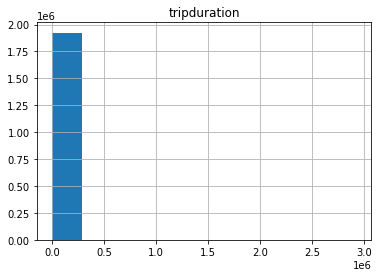

In [6]:
cbMay19.hist(column = "tripduration");
#plt.ticklabel_format(style='plain')

Figure 1: This is the plot for the trip duration.

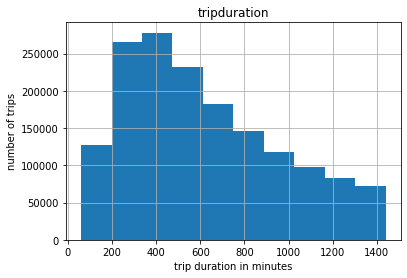

In [8]:
cbMay19_clean = cbMay19[cbMay19["tripduration"] < 1440]
cbMay19_clean.hist(column = "tripduration");
plt.xlabel("trip duration in minutes");
plt.ylabel("number of trips");

Figure 2: This is the plot for the trip duration where any value greater than 1440 has been removed. 

In [39]:
cbMay19_female = cbMay19_clean[cbMay19_clean["gender"] == 2]
cbMay19_female

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
10,236,2019-05-01 00:01:36.4020,2019-05-01 00:05:33.1980,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34411,Subscriber,1957,2
12,536,2019-05-01 00:01:44.6580,2019-05-01 00:10:41.3390,243,Fulton St & Rockwell Pl,40.688410,-73.979458,397,Fulton St & Clermont Ave,40.684157,-73.969223,30962,Subscriber,1974,2
20,290,2019-05-01 00:02:27.8000,2019-05-01 00:07:18.1110,346,Bank St & Hudson St,40.736529,-74.006180,168,W 18 St & 6 Ave,40.739713,-73.994564,30209,Subscriber,1984,2
22,553,2019-05-01 00:02:37.0480,2019-05-01 00:11:50.9870,448,W 37 St & 10 Ave,40.756604,-73.997901,485,W 37 St & 5 Ave,40.750380,-73.983390,21028,Subscriber,1989,2
30,355,2019-05-01 00:03:23.7070,2019-05-01 00:09:18.8550,325,E 19 St & 3 Ave,40.736245,-73.984738,438,St Marks Pl & 1 Ave,40.727791,-73.985649,25468,Subscriber,1990,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924554,699,2019-05-31 23:59:40.5130,2019-06-01 00:11:20.1020,368,Carmine St & 6 Ave,40.730386,-74.002150,470,W 20 St & 8 Ave,40.743453,-74.000040,16373,Subscriber,1976,2
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2


Creates a new sample of only female users.

In [38]:
cbMay19_male = cbMay19[cbMay19["gender"] == 1]
cbMay19_male

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1,2019-05-01 00:00:01.901
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1,2019-05-01 00:00:04.627
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1,2019-05-01 00:00:19.334
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1,2019-05-01 00:00:22.184
5,1598,2019-05-01 00:00:47.5650,2019-05-01 00:27:26.4150,310,State St & Smith St,40.689269,-73.989129,3322,12 St & 4 Ave,40.668603,-73.990439,16614,Customer,1973,1,2019-05-01 00:00:47.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924551,233,2019-05-31 23:59:28.4400,2019-06-01 00:03:21.5050,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34972,Subscriber,1974,1,2019-05-31 23:59:28.440
1924553,824,2019-05-31 23:59:29.8370,2019-06-01 00:13:13.8450,3117,Franklin St & Dupont St,40.735640,-73.958660,3093,N 6 St & Bedford Ave,40.717452,-73.958509,15228,Subscriber,1987,1,2019-05-31 23:59:29.837
1924555,432,2019-05-31 23:59:41.6790,2019-06-01 00:06:54.2000,382,University Pl & E 14 St,40.734927,-73.992005,507,E 25 St & 2 Ave,40.739126,-73.979738,21562,Subscriber,1995,1,2019-05-31 23:59:41.679
1924557,2819,2019-05-31 23:59:45.4930,2019-06-01 00:46:45.1570,436,Hancock St & Bedford Ave,40.682166,-73.953990,436,Hancock St & Bedford Ave,40.682166,-73.953990,26539,Customer,1993,1,2019-05-31 23:59:45.493


Creates a new sample of only male users.

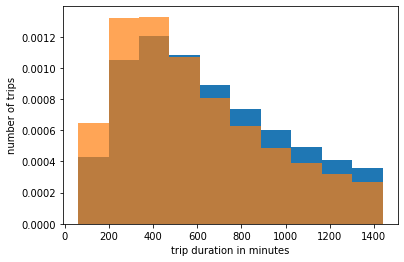

In [11]:
cbMay19_female = cbMay19_clean[cbMay19_clean["gender"] == 2]
cbMay19_male = cbMay19_clean[cbMay19_clean["gender"] == 1]
plt.hist(cbMay19_female["tripduration"], density = 1);
plt.hist(cbMay19_male["tripduration"], density = 1, alpha = 0.7 );
plt.xlabel("trip duration in minutes");
plt.ylabel("number of trips");

Figure 3: A diagram showing two distributions: the female trip duration in blue; and the male trip duration in yellow.

In [40]:
cbMay19_female["tripduration"].mean()

652.1760137019039

In [13]:
cbMay19_male["tripduration"].mean()

588.2070911461445

In [41]:
cbMay19_female["tripduration"].std()

342.0291207094665

In [42]:
cbMay19_male["tripduration"].std()

10338.85865345463

The means are not the same, however, the mean of the male trip duration is larger than the subtraction of the mean of the standard deviation of the female trip duration from the mean of the female trip duration.  
Thus, it can be estimated that the null hypothesis will be rejected.

In [15]:
stats.ttest_ind(cbMay19_female["tripduration"], cbMay19_male["tripduration"])

Ttest_indResult(statistic=100.84403665697793, pvalue=0.0)

This rejects the null hypothesis and shows that more men than women use Citibikes.

NULL hypothesis: 0.05  
Alternative Hypothesis: 2 sigma

In [16]:
stats.ks_2samp(cbMay19_female["tripduration"], cbMay19_male["tripduration"])

KstestResult(statistic=0.08422140452629323, pvalue=0.0)

Since the pvalue is less than the significance threshold, it can be concluded that the two samples do not come from the same parent distribution.

In [17]:
normed_female = (cbMay19_female["tripduration"] - cbMay19_female["tripduration"].mean()) / cbMay19_female["tripduration"].std()
normed_male = (cbMay19_male["tripduration"] - cbMay19_male["tripduration"].mean()) / cbMay19_male["tripduration"].std()

This normalizing the samples in order to get a more accurate answer to the kstest.

In [18]:
stats.ks_2samp(cbMay19_female["tripduration"], cbMay19_male["tripduration"])

KstestResult(statistic=0.08422140452629323, pvalue=0.0)

There is no change in the pvalue, thus, it can be concluded that the two samples do not come from the same parent distribution.

**Extra Credit** 

In [ ]:
pvalue_startime = 0.05

In [19]:
cbMay19["starttime"]

0          2019-05-01 00:00:01.9010
1          2019-05-01 00:00:03.0210
2          2019-05-01 00:00:04.6270
3          2019-05-01 00:00:19.3340
4          2019-05-01 00:00:22.1840
                     ...           
1924558    2019-05-31 23:59:45.5760
1924559    2019-05-31 23:59:46.4650
1924560    2019-05-31 23:59:51.5060
1924561    2019-05-31 23:59:52.4170
1924562    2019-05-31 23:59:55.5500
Name: starttime, Length: 1924563, dtype: object

This prints out the start time values for the distribution.

In [20]:
cbMay19["tripdate"] = pd.to_datetime(cbMay19.starttime)
cbMay19["tripdate"]

0         2019-05-01 00:00:01.901
1         2019-05-01 00:00:03.021
2         2019-05-01 00:00:04.627
3         2019-05-01 00:00:19.334
4         2019-05-01 00:00:22.184
                    ...          
1924558   2019-05-31 23:59:45.576
1924559   2019-05-31 23:59:46.465
1924560   2019-05-31 23:59:51.506
1924561   2019-05-31 23:59:52.417
1924562   2019-05-31 23:59:55.550
Name: tripdate, Length: 1924563, dtype: datetime64[ns]

This converts the datatype in the starttime column to datetime in nanoseconds.

In [59]:
cbMay19_weekday = cbMay19[cbMay19["tripdate"].dt.weekday < 5]

In [64]:
cbMay19_weekday["tripduration"]

0           139
1           754
2          2308
3           143
4           138
           ... 
1924558     304
1924559     324
1924560    1926
1924561    2047
1924562     964
Name: tripduration, Length: 1519349, dtype: int64

This divides the dataframe by weekdays

In [65]:
cbMay19_weekday["tripduration"].mean()

997.8067363061416

In [66]:
cbMay19_weekday["tripduration"].std()

11732.690924587994

In [58]:
cbMay19_weekend = cbMay19[cbMay19["tripdate"].dt.weekday >= 5]

This divides the dataframe by weekends.

In [ ]:
cbMay19_weekend["tripduration"]

In [68]:
cbMay19_weekend["tripduration"].mean()

1327.3382953204973

In [69]:
cbMay19_weekend["tripduration"].std()

15211.761726988416

In [61]:
stats.ttest_ind(cbMay19_weekday["tripduration"], cbMay19_weekend["tripduration"])

Ttest_indResult(statistic=-14.856242632365019, pvalue=6.378763724430235e-50)

The pvalue is much higher than the threshold, thus, the trip durations on weekends and weekdays are not characteristically different.